# Тема “Обучение с учителем”

## Задание 1


Импортируйте библиотеки pandas и numpy.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn..
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью
функции train_test_split так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random state должен быть равен 42.
Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля
sklearn.linear_model.
Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на
тестовых.


In [1]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np

In [5]:
!pip install keras

Defaulting to user installation because normal site-packages is not writeable


In [11]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
  Using cached tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata (5.0 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached ml_dtypes-0.3.2-cp311-cp311-win_amd64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.64.1-cp311-cp311-win_amd64.whl.metadata (3.4 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.met

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [13]:
from keras.datasets import boston_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression



In [15]:
(X, y), (Xt, yt) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
lr = LinearRegression()

In [21]:
lr.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = lr.predict(X_test)
y_pred.shape

(122,)

In [41]:
from sklearn.metrics import r2_score

In [45]:
r2_lr = r2_score(y_test, y_pred)
r2_lr

0.6612467516162941

In [49]:
import matplotlib.pyplot as plt

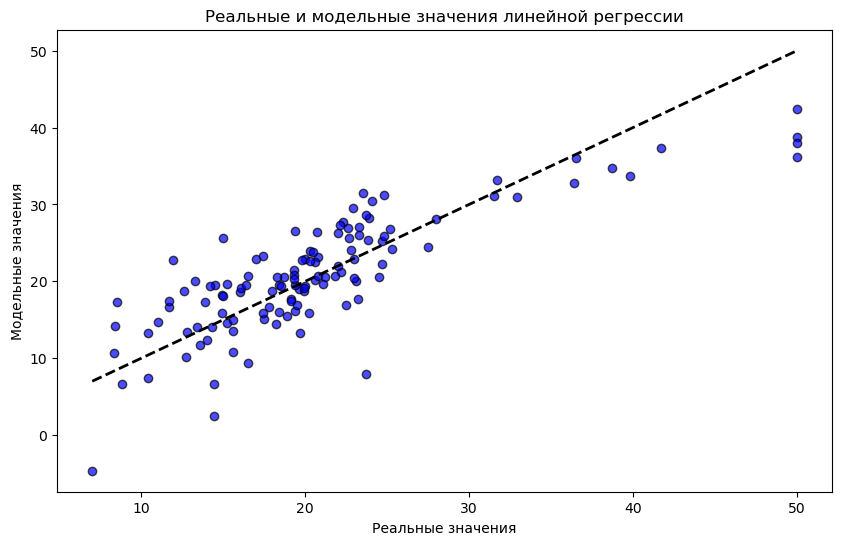

In [53]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Реальные значения')
plt.ylabel('Модельные значения')
plt.title('Реальные и модельные значения линейной регрессии')
plt.show()

## Задание 2


Создайте модель под названием model с помощью класса RandomForestRegressor из модуля
sklearn.ensemble.
Сделайте агрумент n_estimators равным 1000,
max_depth должен быть равен 12 и random_state сделайте равным 42.
Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно
применение массивов вместо датафрейма.
Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из
предыдущего задания.
Напишите в комментариях к коду, какая модель в данном случае работает лучше.

In [62]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [63]:
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

In [66]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [70]:
y_pred_rf = model.predict(X_test)

In [72]:
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Метрика R² для модели случайного леса: {r2_rf}")

Метрика R² для модели случайного леса: 0.8271034260241209


In [74]:
if r2_rf > r2_lr:
    print("Модель Random Forest Regressor лучше.")
else:
    print("Модель Linear Regression лучше.")

Модель Random Forest Regressor лучше.


Text(0.5, 1.0, 'Реальные и модельные значения линейной регрессии')

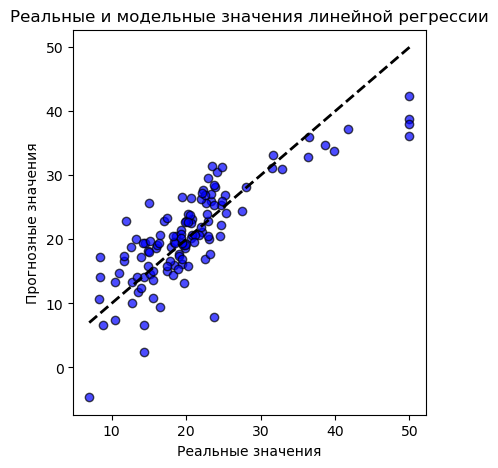

In [78]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Реальные значения')
plt.ylabel('Прогнозные значения')
plt.title('Реальные и модельные значения линейной регрессии')

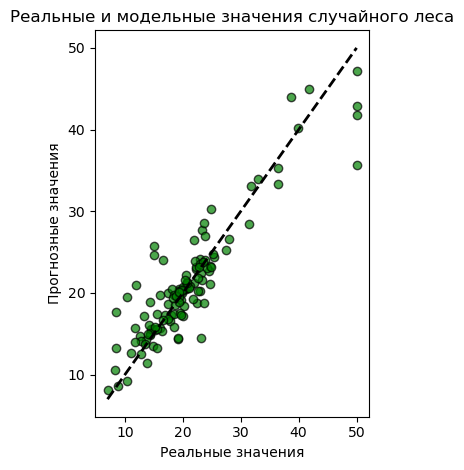

In [84]:
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, color='green', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Реальные значения')
plt.ylabel('Прогнозные значения')
plt.title('Реальные и модельные значения случайного леса')

plt.tight_layout()
plt.show()